## Agenda 
        1 - Data Preprocessing
        2 - Fitting Linear Regression Model to the training set
        3 - Predicting the Result
        4 - Visualization 

**First look at the dataset**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('studentscores.csv')

In [44]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
# A small dataset
dataset.shape

(25, 2)

In [16]:
# No NaN values
dataset.isna().any()

Hours     False
Scores    False
dtype: bool

## 1 - Data Preprocessing
        Basically:
        Feature is the data we feed in to the algorithm.
        Label is what we want to predict.
        
        Ex: Hey, Machine, tell me if this video(feature) can be accessed by children.
            
            [Machine uses what have learned analysing other videos and returns a prediction/probability]
            
            0 - Yes, it can.    (label)
            1 - No, it can not. (label)
        
            Now, the system can decide if the video will be will be released for children or not.
            
            
        In our case We have:
            
            Hey, Machine, what will be my score(label) if study N hours(feature)?
        
        And to make the model learn the correlation between these two variables (hours studied and score on test),
        We first need to give it a sample, so it can apply math to it and discover "the rules of the game", and in
        the end, it'll be able to play and give us a properly answer/classification.            

In [24]:
# We call the features 'X' and the labels 'Y'
X = dataset.iloc[ : ,   : 1 ].values
Y = dataset.iloc[ : , 1 ].values

In [34]:
''' Take a good look, We just separeted the columns '''

print("length of ['Hours']  --", len(dataset.Hours))
print("length of ['Scores'] --", len(dataset.Scores))
print('length of X -', len(X))
print('length of Y -', len(Y))

length of ['Hours']  -- 25
length of ['Scores'] -- 25
length of X - 25
length of Y - 25


In [23]:
stop_point = 0

for hour, x in zip(dataset.Hours, X):
    print('\nhour in dataset: ', hour)
    print('feature X: ', x)
    
    if stop_point == 5: break
    stop_point+=1


hour in dataset:  2.5
feature X:  [2.5]

hour in dataset:  5.1
feature X:  [5.1]

hour in dataset:  3.2
feature X:  [3.2]

hour in dataset:  8.5
feature X:  [8.5]

hour in dataset:  3.5
feature X:  [3.5]

hour in dataset:  1.5
feature X:  [1.5]


In [27]:
stop_point = 0

for score, y in zip(dataset.Scores, Y):
    print('\nhour in dataset: ', score)
    print('label Y: ', y)
    
    if stop_point == 5: break
    stop_point+=1


hour in dataset:  21
label Y:  21

hour in dataset:  47
label Y:  47

hour in dataset:  27
label Y:  27

hour in dataset:  75
label Y:  75

hour in dataset:  30
label Y:  30

hour in dataset:  20
label Y:  20


**Now We have our features and labels. We need to split our data into training and test subsets.**<br>
    
    And as you can see we do this using the train_test_split() method.


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

    test_size ==> proportion of the dataset to include in the test split 1/4 = 25%
    (the other part will be treated as training split)

In [65]:
dataset_rows = 25 # total number of features and labels
7/dataset_rows # It approximates closer to the higher value (since 6/25 is 24%)

0.28

    random_state ==> setting it a fixed value will guarantee that the same sequence of random numbers 
    are generated each time you run the code. And unless there is some other randomness present in the 
    process, the results produced will be same as always. In other words, the first time it'll be a random 
    selection, the nexts numbers will be the same (for studies purposes).

In [68]:
print('X_train length:', len(X_train))
print('X_test length: ', len(X_test))
print('Y_train length:',len(Y_train))
print('Y_test length: ', len(Y_test))

print(f'{len(X_train)} + {len(X_test)} =', len(X_train)+len(X_test))

X_train length: 18
X_test length:  7
Y_train length: 18
Y_test length:  7
18 + 7 = 25


In [52]:
''' 25 values, just linke the 25 rows in our dataset '''
dataset.shape

(25, 2)

In [104]:
''' Quick look at features and labels '''
print('X_train (features used in training)\n', X_train)   # hours -  features
print('\nY_train (labels used in training)\n', Y_train)   # scores - labels
print('--'*20)
print('\nX_test (features the model will see after training so we can see how good it went)\n', X_test) 
print('\nY_test (labels/ correct answers/predictions the model should give us when we give X_test to it predict)\n', Y_test)

X_train (features used in training)
 [[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]

Y_train (labels used in training)
 [86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
----------------------------------------

X_test (features the model will see after training so we can see how good it went)
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]

Y_test (labels/ correct answers/predictions the model should give us when we give X_test to it predict)
 [20 27 69 30 62 35 24]


## 2 - Fitting Simple Linear Regression Model to the training set
        Picking the correct line/mathematical function((y = mx + b)) for this model. 
        Making the algorithm learn the relationship between the features and labels. So
        it will be able to use the "rules of the game" to play it.

In [8]:
from sklearn.linear_model import LinearRegression

# Creating an object (regressor) from LinearRegression class to use its methods
regressor = LinearRegression()

In a nutshell: **fitting is equal to training**. Then, after the model is trained **.fit(features,  feature_labels_so_it_can_compare_and_learn)**, it can be used to make predictions, usually with a .predict() method call.

In [83]:
regressor = regressor.fit(X_train, Y_train)

## 3 - Predecting the Result
        If you pay attention, you'll notice we just passed X_train and Y_train to the model.
        Now it is trained, we can use the X_test and Y_test to see if it is working as we
        wanted and predicting scores for hours of study it has never seen.

In [98]:
# You can even look for these numbers in the dataset, and Remember:
print('X_test:\n', X_test)   # Feature is the data we feed in to the algorithm.
print('\nY_test:\n', Y_test) # Label is what we want to predict.

X_test:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]

Y_test:
 [20 27 69 30 62 35 24]


**Now we know the actual score values, We can compare them to the prediction the model will make.**

In [128]:
# Score_prediction
Y_pred = regressor.predict(X_test)

for study_hours, test_value, predicted_value in zip(X_test, Y_test,Y_pred):
    print('\nHours of study -------------------', study_hours)
    print('Real score value -----------------', test_value)
    print('Prediction from Linear Regression ', int(predicted_value))


Hours of study ------------------- [1.5]
Real score value ----------------- 20
Prediction from Linear Regression  16

Hours of study ------------------- [3.2]
Real score value ----------------- 27
Prediction from Linear Regression  33

Hours of study ------------------- [7.4]
Real score value ----------------- 69
Prediction from Linear Regression  75

Hours of study ------------------- [2.5]
Real score value ----------------- 30
Prediction from Linear Regression  26

Hours of study ------------------- [5.9]
Real score value ----------------- 62
Prediction from Linear Regression  60

Hours of study ------------------- [3.8]
Real score value ----------------- 35
Prediction from Linear Regression  39

Hours of study ------------------- [1.9]
Real score value ----------------- 24
Prediction from Linear Regression  20


## 4 - Visualization
        The red dots represent the actual data (in the training subset):
        
        Y_train
        |
        |
        |
        |
        |
        |
        |_______________X_train   
        
        And the blue line is the values of Y that the model predicted.
        
        When training, the model/algorithm is creating/fitting the best
        line/function(y = mx + b) that fits the data. And that way 
        it can predict other values.       

Text(0, 0.5, 'Score')

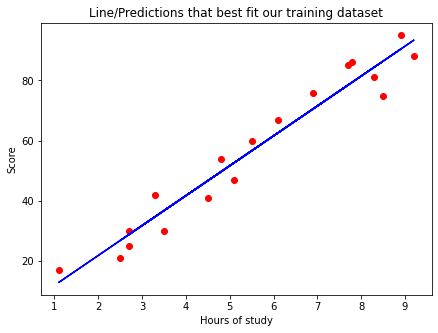

In [129]:
# Visualising the Training results
plt.figure(figsize=(7,5))
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

plt.title('Line/Predictions that best fit our training dataset')
plt.xlabel('Hours of study')
plt.ylabel('Score')

        Here, We basically have the same prediction, but applied 
        on the data the model has never seen (test subset).

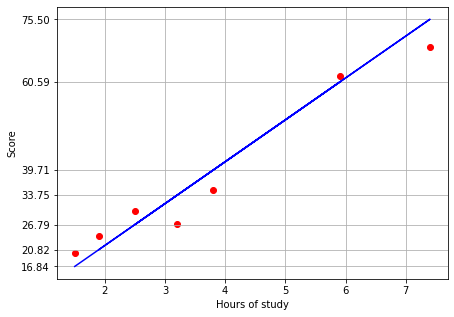

In [115]:
# Visualizing the test results
plt.figure(figsize=(7,5))
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.yticks(Y_pred)
plt.grid(axis='y')